In [18]:
# conda install -c conda-forge --strict-channel-priority osmnx
# pip install pycairo

import osmnx as ox

/Users/pbhustali/miniforge3/envs/imp-rl-competition-env/lib/python3.9/site-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


{'n': 16, 'm': 22, 'k_avg': 2.75, 'edge_length_total': 2280.335, 'edge_length_avg': 103.65159090909091, 'streets_per_node_avg': 4.0, 'streets_per_node_counts': {0: 0, 1: 0, 2: 0, 3: 1, 4: 14, 5: 1}, 'streets_per_node_proportions': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0625, 4: 0.875, 5: 0.0625}, 'intersection_count': 16, 'street_length_total': 2280.335, 'street_segment_count': 22, 'street_length_avg': 103.65159090909091, 'circuity_avg': 1.0014913485122388, 'self_loop_proportion': 0.0}


/Users/pbhustali/miniforge3/envs/imp-rl-competition-env/lib/python3.9/site-packages/osmnx/convert.py:381: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  dupes = edges[mask].dropna(subset=["geometry"])


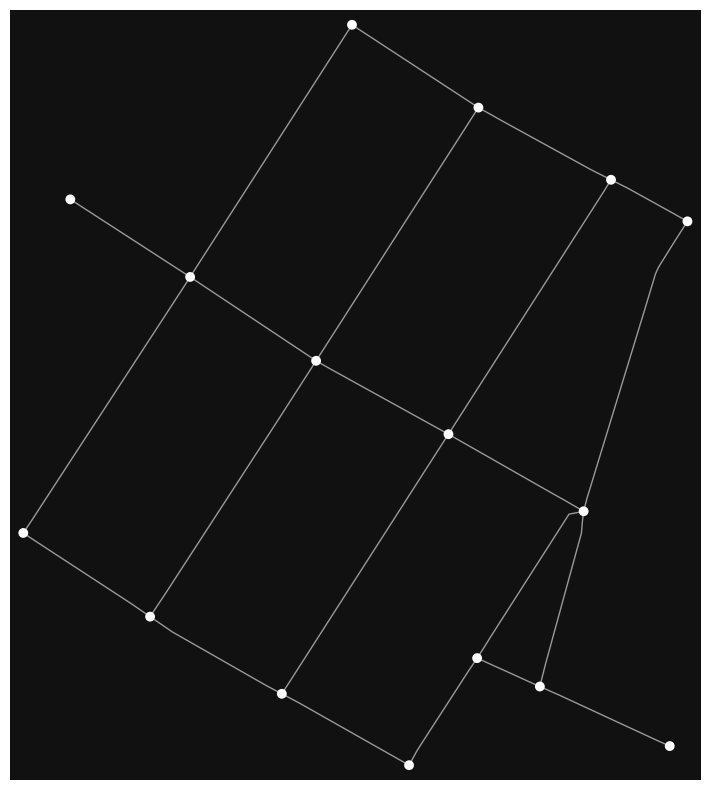

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [19]:
# place_name = "University of Toronto"
place_name = "SoHo, New York, NY"
# place_name = "Amsterdam Zuid"
network_type = "drive"

# custom_filter = ('["highway"~"motorway"]')
custom_filter = None

# networkx graph of the named place
graph = ox.graph_from_address(place_name, 
                              dist=200, # distance in meters
                              network_type=network_type, 
                              simplify=True, 
                              custom_filter=custom_filter)

graph = graph.to_undirected() # default is MultiGraph

print(ox.basic_stats(graph))

# Plot the graphs
ox.plot_graph(graph,figsize=(10,10), node_size=50)

In [20]:
ox.folium.plot_graph_folium(graph)

/var/folders/w7/40d8p5l1307f8nrkqgv9q47xhwh1n2/T/ipykernel_46299/1038003840.py:1: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  ox.folium.plot_graph_folium(graph)


In [21]:
type(graph)

networkx.classes.multigraph.MultiGraph

In [22]:
nodes, edges = ox.graph_to_gdfs(graph)

nodes.head(5)

,y,x,street_count,highway,geometry
osmid,,,,,
42428438,40.721794,-73.999862,4,NaN,POINT (-73.99986 40.72179)
42428441,40.723021,-73.998812,4,traffic_signals,POINT (-73.99881 40.72302)
42428444,40.724235,-73.997785,4,traffic_signals,POINT (-73.99778 40.72424)
42430038,40.721174,-73.996575,4,traffic_signals,POINT (-73.99657 40.72117)
42430041,40.721459,-73.997396,4,traffic_signals,POINT (-73.99740 40.72146)


In [23]:
# sort edges by name
edges.sort_values(by='name', inplace=True)

edges.head(100)

osmid  oneway lanes  \
u        v        key                                          
42428438 42428441 0                  968737542    True     2   
42428441 42428444 0                  968737540    True     2   
42428438 42432156 0                  968737543    True     2   
         42432161 0                   46348767    True     2   
42432161 42432165 0                   46348767    True     2   
42430041 42442247 0                  991205022    True     1   
42432161 42442255 0                    5673210    True   NaN   
42442255 42458267 0                    5673210    True   NaN   
42430038 42430041 0                    5669892   False     2   
42430041 42430044 0                  991205021   False     2   
42430044 42432165 0                 1051858090    True     3   
         42442247 0                    5671322    True     1   
42442247 42445498 0                  420358890    True     2   
42442269 42449576 0                  496980201    True     1   
42432156 42442269 0    [496980201, 1316839633]    True     1   
42428444 42449576 0                  968737541    True   NaN   
         42458267 0                  992141077    True   NaN   
42445498 42458267 0                  992141077    True   NaN   
42428441 42442255 0                  439842835    True   NaN   
42442247 42442255 0                  439842835    True   NaN   
42442269 42442273 0                  439842836    True   NaN   
42428441 42442269 0                  439842836    True   NaN   

                                   name      highway maxspeed  reversed  \
u        v        key                                                     
42428438 42428441 0            Broadway    secondary   25 mph     False   
42428441 42428444 0            Broadway    secondary   25 mph     False   
42428438 42432156 0       Broome Street      primary   25 mph     False   
         42432161 0       Broome Street      primary   25 mph     False   
42432161 42432165 0       Broome Street      primary   25 mph     False   
42430041 42442247 0     Cleveland Place    secondary   25 mph     False   
42432161 42442255 0       Crosby Street  residential   25 mph     False   
42442255 42458267 0       Crosby Street  residential   25 mph     False   
42430038 42430041 0      Kenmare Street      primary   25 mph      True   
42430041 42430044 0      Kenmare Street      primary   25 mph      True   
42430044 42432165 0    Lafayette Street      primary   25 mph     False   
         42442247 0    Lafayette Street  residential   25 mph     False   
42442247 42445498 0    Lafayette Street    secondary   25 mph     False   
42442269 42449576 0       Mercer Street  residential   25 mph     False   
42432156 42442269 0       Mercer Street  residential   25 mph     False   
42428444 42449576 0       Prince Street  residential   25 mph     False   
         42458267 0       Prince Street  residential   25 mph     False   
42445498 42458267 0       Prince Street  residential   25 mph     False   
42428441 42442255 0       Spring Street  residential   25 mph     False   
42442247 42442255 0       Spring Street  residential   25 mph     False   
42442269 42442273 0       Spring Street  residential   25 mph     False   
42428441 42442269 0       Spring Street  residential   25 mph     False   

                        length  \
u        v        key            
42428438 42428441 0    162.614   
42428441 42428444 0    160.353   
42428438 42432156 0     81.006   
         42432161 0     81.461   
42432161 42432165 0     77.786   
42430041 42442247 0     96.441   
42432161 42442255 0    164.479   
42442255 42458267 0    160.965   
42430038 42430041 0     76.176   
42430041 42430044 0     36.714   
42430044 42432165 0     67.667   
         42442247 0     98.999   
42442247 42445498 0    165.066   
42442269 42449576 0    159.747   
42432156 42442269 0    162.932   
42428444 42449576 0     80.583   
         42458267 0     80.499   
42445498 42458267 0     46.396   
42428441 42442255 0    

In [27]:
edges

osmid  oneway lanes  \
u        v        key                                          
42428438 42428441 0                  968737542    True     2   
42428441 42428444 0                  968737540    True     2   
42428438 42432156 0                  968737543    True     2   
         42432161 0                   46348767    True     2   
42432161 42432165 0                   46348767    True     2   
42430041 42442247 0                  991205022    True     1   
42432161 42442255 0                    5673210    True   NaN   
42442255 42458267 0                    5673210    True   NaN   
42430038 42430041 0                    5669892   False     2   
42430041 42430044 0                  991205021   False     2   
42430044 42432165 0                 1051858090    True     3   
         42442247 0                    5671322    True     1   
42442247 42445498 0                  420358890    True     2   
42442269 42449576 0                  496980201    True     1   
42432156 42442269 0    [496980201, 1316839633]    True     1   
42428444 42449576 0                  968737541    True   NaN   
         42458267 0                  992141077    True   NaN   
42445498 42458267 0                  992141077    True   NaN   
42428441 42442255 0                  439842835    True   NaN   
42442247 42442255 0                  439842835    True   NaN   
42442269 42442273 0                  439842836    True   NaN   
42428441 42442269 0                  439842836    True   NaN   

                                   name      highway maxspeed  reversed  \
u        v        key                                                     
42428438 42428441 0            Broadway    secondary   25 mph     False   
42428441 42428444 0            Broadway    secondary   25 mph     False   
42428438 42432156 0       Broome Street      primary   25 mph     False   
         42432161 0       Broome Street      primary   25 mph     False   
42432161 42432165 0       Broome Street      primary   25 mph     False   
42430041 42442247 0     Cleveland Place    secondary   25 mph     False   
42432161 42442255 0       Crosby Street  residential   25 mph     False   
42442255 42458267 0       Crosby Street  residential   25 mph     False   
42430038 42430041 0      Kenmare Street      primary   25 mph      True   
42430041 42430044 0      Kenmare Street      primary   25 mph      True   
42430044 42432165 0    Lafayette Street      primary   25 mph     False   
         42442247 0    Lafayette Street  residential   25 mph     False   
42442247 42445498 0    Lafayette Street    secondary   25 mph     False   
42442269 42449576 0       Mercer Street  residential   25 mph     False   
42432156 42442269 0       Mercer Street  residential   25 mph     False   
42428444 42449576 0       Prince Street  residential   25 mph     False   
         42458267 0       Prince Street  residential   25 mph     False   
42445498 42458267 0       Prince Street  residential   25 mph     False   
42428441 42442255 0       Spring Street  residential   25 mph     False   
42442247 42442255 0       Spring Street  residential   25 mph     False   
42442269 42442273 0       Spring Street  residential   25 mph     False   
42428441 42442269 0       Spring Street  residential   25 mph     False   

                        length  \
u        v        key            
42428438 42428441 0    162.614   
42428441 42428444 0    160.353   
42428438 42432156 0     81.006   
         42432161 0     81.461   
42432161 42432165 0     77.786   
42430041 42442247 0     96.441   
42432161 42442255 0    164.479   
42442255 42458267 0    160.965   
42430038 42430041 0     76.176   
42430041 42430044 0     36.714   
42430044 42432165 0     67.667   
         42442247 0     98.999   
42442247 42445498 0    165.066   
42442269 42449576 0    159.747   
42432156 42442269 0    162.932   
42428444 42449576 0     80.583   
         42458267 0     80.499   
42445498 42458267 0     46.396   
42428441 42442255 0    

In [ ]:
topology = {}

topology['graph'] = {'directed': True,
                    'type': "list",
                    'nodes': [], 
                    'edges': []}

osmids = []
for index, row in nodes.iterrows():
    osmids.append(index)

# nodes
for index, row in nodes.iterrows():
    id = osmids.index(index)
    _x = {'id': id, 'position_x': row['x'], 'position_y': row['y']}
    topology['graph']['nodes'].append(_x)

# edges
k = 0
for index, row in edges.iterrows():

    source = osmids.index(index[0])
    target = osmids.index(index[1])
    
    r = {'id': k, 'source': source, 'target': target, 'distance': row['length']}
    _r = {'id': k+1, 'source': target, 'target': source, 'distance': row['length']}
    topology['graph']['edges'].append(r)
    topology['graph']['edges'].append(_r)
    k += 2

# segments
topology['segments'] = {"type": "list", 
                        "list": []}

for index, row in edges.iterrows():
    length = row['length']
    capacity = 2*length / 4
    speed = 25 * 1.6 # km/h
    travel_time = length / 1000 / speed

    source = osmids.index(index[0])
    target = osmids.index(index[1])

    r = {'source': source, 'target': target, 'travel_time': travel_time, 'capacity': capacity, 'position_x': None, 'position_y': None}
    _r = {'source': target, 'target': source, 'travel_time': travel_time, 'capacity': capacity, 'position_x': None, 'position_y': None}

    topology['segments']['list'].append(r)
    topology['segments']['list'].append(_r)


In [29]:
len(topology['segments']['list'])

44

In [30]:
len(topology['graph']['nodes'])

16

In [31]:
# write to YAML
import yaml

with open('topology.yaml', 'w') as file:
    yaml.dump(topology, file)

In [33]:
import numpy as np

from imp_act import make

env = make("SoHo-v1")

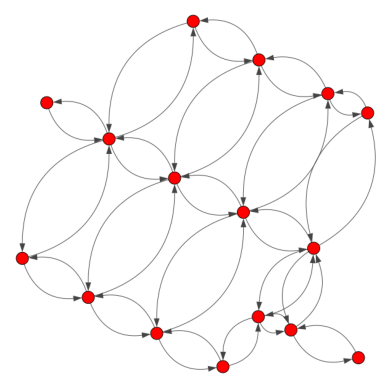

In [34]:
import igraph as ig
import matplotlib.pyplot as plt

# Assuming g is your igraph graph
g = env.graph

# Specify node locations
node_positions = [(v['position_x'], -v['position_y']) for v in g.vs]

# Plot the graph using igraph
layout = ig.Layout(node_positions)
ig.plot(g, layout=layout, target='graph.png')

# Display the plot using matplotlib
img = plt.imread("graph.png")
plt.imshow(img)
plt.axis('off')  # Turn off the axis
plt.show()